In [1]:
import pandas as pd 
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("prepared_dataset_main_finalized.csv")

In [3]:
df.head(3)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Psyco,Gender_Male,Gender_Other,Smoking_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes,Family History of Anxiety_Yes
0,64,6.1,0.6,74,12,8,106,27,2,5,9,4.0,4,1,0,0,0,0,1,1
1,64,5.5,1.6,246,13,1,84,14,5,0,5,3.0,0,0,1,1,0,1,0,0
2,64,6.1,5.5,231,19,9,80,29,1,2,4,6.0,2,0,0,0,1,0,0,0


In [4]:
df = df.drop(columns='Psyco')

In [5]:
df.head(1)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Gender_Male,Gender_Other,Smoking_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes,Family History of Anxiety_Yes
0,64,6.1,0.6,74,12,8,106,27,2,5,9,4.0,1,0,0,0,0,1,1


In [6]:
df.shape

(11000, 19)

In [7]:
df = df.dropna()

In [8]:
df.isnull()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Gender_Male,Gender_Other,Smoking_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes,Family History of Anxiety_Yes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.dtypes

Age                                    int64
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Therapy Sessions (per month)           int64
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
Gender_Male                            int64
Gender_Other                           int64
Smoking_Yes                            int64
Dizziness_Yes                          int64
Medication_Yes                         int64
Recent Major Life Event_Yes            int64
Family History of Anxiety_Yes          int64
dtype: object

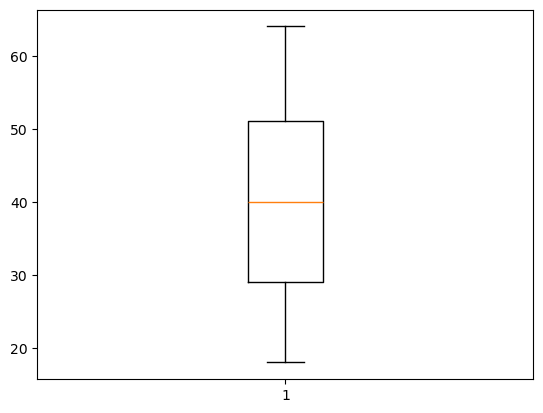

In [11]:
plt.boxplot(df['Age'])
plt.show()

In [12]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

In [13]:
IQR = q3-q1

In [14]:
min_range = q1-(1.5*IQR)
max_range = q3 + (1.5 * IQR)

In [15]:
df = df[(df["Age"]>min_range) & (df["Age"]<max_range)]

In [16]:
df.head(2)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10),Gender_Male,Gender_Other,Smoking_Yes,Dizziness_Yes,Medication_Yes,Recent Major Life Event_Yes,Family History of Anxiety_Yes
0,64,6.1,0.6,74,12,8,106,27,2,5,9,4.0,1,0,0,0,0,1,1
1,64,5.5,1.6,246,13,1,84,14,5,0,5,3.0,0,1,1,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [18]:
x_train , x_test , y_train , y_test = train_test_split(pd.concat([df.iloc[:,:14],df.iloc[:,15:]] , axis=1),df.iloc[:,14],random_state=42,test_size=0.2)

In [19]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [20]:
x_train

array([[-1.60677798,  0.8602772 , -0.72328291, ...,  0.97220433,
         0.97908236, -1.06409562],
       [-0.16872984, -1.58978246, -0.61422598, ...,  0.97220433,
         0.97908236, -1.06409562],
       [-0.69853705, -1.67145111, -0.61422598, ...,  0.97220433,
         0.97908236,  0.93976517],
       ...,
       [-0.01735635,  0.04359064,  1.78502648, ...,  0.97220433,
        -1.02136453, -1.06409562],
       [ 1.49637854,  0.20692796, -0.01441286, ...,  0.97220433,
         0.97908236,  0.93976517],
       [-0.54716356,  1.84030106,  0.0401156 , ...,  0.97220433,
         0.97908236, -1.06409562]])

In [21]:
x_test

array([[ 1.79912552, -1.09977053, -1.48668142, ..., -1.02859036,
        -1.02136453,  0.93976517],
       [-0.01735635,  1.02361451,  0.42181485, ..., -1.02859036,
         0.97908236, -1.06409562],
       [-0.47147681, -1.91645708, -0.94139677, ..., -1.02859036,
        -1.02136453,  0.93976517],
       ...,
       [-1.53109124,  2.98366223,  0.14917253, ..., -1.02859036,
        -1.02136453, -1.06409562],
       [-0.09304309, -2.07979439, -0.66875444, ...,  0.97220433,
         0.97908236, -1.06409562],
       [-0.6228503 ,  0.53360258,  1.67596955, ...,  0.97220433,
        -1.02136453, -1.06409562]])

In [22]:
y_train

10735    0
5937     1
7642     1
3328     0
8681     0
        ..
5734     1
5191     1
5390     1
860      1
7270     0
Name: Smoking_Yes, Length: 8800, dtype: int64

In [23]:
lable = LabelEncoder()
y_train = lable.fit_transform(y_train)
y_test = lable.fit_transform(y_test)

In [24]:
y_train

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
y_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor  =  torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [27]:
x_train_tensor.shape

torch.Size([8800, 18])

In [28]:
y_train_tensor.shape

torch.Size([8800])

In [33]:
import torch

class MyNN():
    def __init__(self, X):
        self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

    def forward(self, X):
        z = torch.matmul(X, self.weights) + self.bias  # Use X @ W + b
        y_pred = torch.sigmoid(z)
        return y_pred

    def loss_function(self, y_pred, y_true):
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
        loss = -(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred)).mean()
        return loss 

In [35]:
learning_rate = 0.1
epochs =25 

In [37]:
model = MyNN(x_train_tensor)
# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(x_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 1.3908091312903876
Epoch: 2, Loss: 1.3700362585540846
Epoch: 3, Loss: 1.349654942477401
Epoch: 4, Loss: 1.329674691451939
Epoch: 5, Loss: 1.3101047833842854
Epoch: 6, Loss: 1.2909541597917582
Epoch: 7, Loss: 1.272231311092977
Epoch: 8, Loss: 1.2539441549946329
Epoch: 9, Loss: 1.2360999104234682
Epoch: 10, Loss: 1.218704969973604
Epoch: 11, Loss: 1.201764774302555
Epoch: 12, Loss: 1.1852836922786645
Epoch: 13, Loss: 1.169264910918509
Epoch: 14, Loss: 1.1537103392144714
Epoch: 15, Loss: 1.1386205298036929
Epoch: 16, Loss: 1.123994622044875
Epoch: 17, Loss: 1.1098303094421484
Epoch: 18, Loss: 1.0961238335029793
Epoch: 19, Loss: 1.0828700050835012
Epoch: 20, Loss: 1.0700622531272337
Epoch: 21, Loss: 1.0576926995260698
Epoch: 22, Loss: 1.045752257716375
Epoch: 23, Loss: 1.0342307516536637
Epoch: 24, Loss: 1.0231170510566239
Epoch: 25, Loss: 1.0123992183218313


In [39]:
model.bias

tensor([0.0592], dtype=torch.float64, requires_grad=True)

In [53]:
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.1).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5127272605895996
